# Duplicate image removal using hashing

This notebook helps remove duplicates from a single directory with plotting and illustration.     
     
At it's end is also a script for looping over multiple directories of images - run this to recreate my dataset prep after running 01_scraping_images.ipynb

In [32]:
import hashlib
from imread import imread
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob
import time
import numpy as np
import os

## Visualize on example directory

In [11]:
def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()

**Current directory**

In [12]:
os.getcwd()

'/Users/alex/Documents/Projects/PlantPal/data/duplication_test'

**new current working directory**

In [13]:
os.chdir(r'/Users/alex/Documents/Projects/PlantPal/data/combined_17c/Aloe_Vera')
os.getcwd()

'/Users/alex/Documents/Projects/PlantPal/data/duplication_test'

**return number of files in CWD**

In [14]:
file_list = os.listdir()
print(len(file_list))

8


In [15]:
file_list

['Asparagus_Fern_14 2 copy.jpeg',
 'Asparagus_Fern_1 2 copy.jpeg',
 'Asparagus_Fern_14 2 copy 2.jpeg',
 'Asparagus_Fern_8.jpeg',
 'Rubber_Plant_7.jpeg',
 'Asparagus_Fern_1 2 copy 3.jpeg',
 'Asparagus_Fern_1 2 copy 2.jpeg',
 'Asparagus_Fern_8 copy.jpeg']

**Identify duplicates**

In [16]:
duplicates = []
hash_keys = dict()
for index, filename in enumerate(os.listdir('.')):
    if os.path.isfile(filename):
        with open(filename, 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys:
            hash_keys[filehash] = index
        else:
            duplicates.append((index, hash_keys[filehash]))

duplicates  # list duplicates

[(2, 0), (5, 1), (6, 1), (7, 3)]

**plot duplicates and indexes**

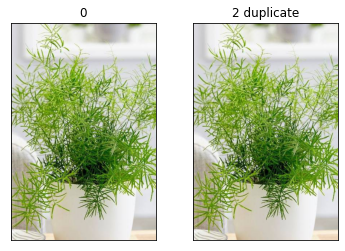

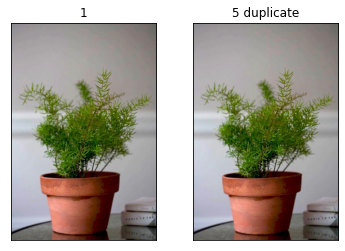

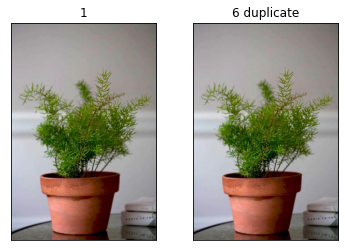

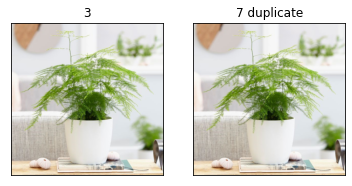

In [17]:
for file_indexes in duplicates:
    try:
        plt.subplot(121), plt.imshow(imread(file_list[file_indexes[1]]))
        plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

        plt.subplot(122), plt.imshow(imread(file_list[file_indexes[0]]))
        plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks(
            []), plt.yticks([])
        plt.show()

    except OSError as e:
        continue

**Delete Files After Printing**

In [18]:
for index in duplicates:
    os.remove(file_list[index[0]])

# Loop over all files in dataset

In [33]:
def remove_duplicates(path, file_ext='jpeg'):
    """removes all duplicate images in the given directory"""

    duplicates = []
    hash_keys = dict()
    files = glob.glob(f'{path}/*.{file_ext}')

    for index, filename in enumerate(files):
        if os.path.isfile(filename):
            with open(filename, 'rb') as f:
                filehash = hashlib.md5(f.read()).hexdigest()
            if filehash not in hash_keys:
                hash_keys[filehash] = index
            else:
                duplicates.append((index, hash_keys[filehash]))

    # remove files
    for index in duplicates:
        os.remove(files[index[0]])

In [34]:
for directory in glob.glob('/Users/alex/Documents/Projects/PlantPal/data/combined_16c/*'):
    remove_duplicates(directory, file_ext='jpeg')